Index(['Reading', 'Unit', 'Range Digits', 'Disp Digits', 'Math', 'Start Group',
       'Limit1 High', 'Limit1 Low', 'Limit2 High', 'Limit2 Low', 'Terminal',
       'Questionable', 'Origin', 'Value', 'Unit.1', 'Digits', 'Output',
       'Sense', 'Source Limit', 'Overtemp', 'Relative Time'],
      dtype='object')


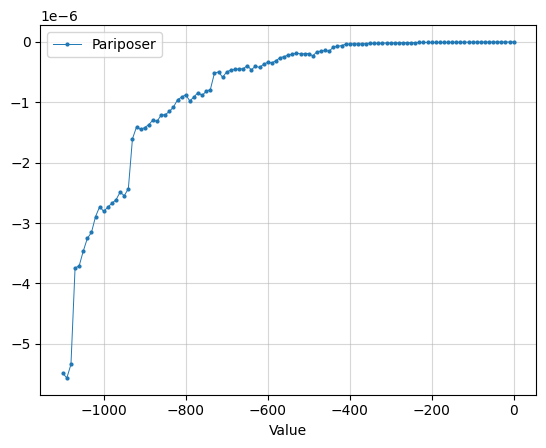

In [44]:
data = r"C:\Code\Next-Gen-Pockels-Control\TEST_DATA\pariposer_IV.csv"

import pandas as pd
from matplotlib import pyplot as plt

df_pariposer = pd.read_csv(data, sep=',', header=0, skiprows=8)

print(df.columns)

fig, ax = plt.subplots()
df_pariposer.plot(x='Value', y='Reading', style='-o', label='Pariposer', markersize=2, linewidth=0.7, ax=ax)
# df.plot(x='Value', y='Reading', style='-', label='Pariposer', ax=ax)
# df.plot(x='Value', y='Reading', style='o', label='Pariposer raw', markersize=2, ax=ax)

plt.grid(True, alpha=0.5)


<class 'numpy.ndarray'>
(69,)
        Current     Voltage       Time
0  2.061995e-11   -0.017212   0.000000
1  1.832717e-09   49.996950   5.446739
2  2.574680e-09   99.992800  10.893440
3  3.214183e-09  150.002300  16.340170
4  3.711619e-09  199.994800  21.786900


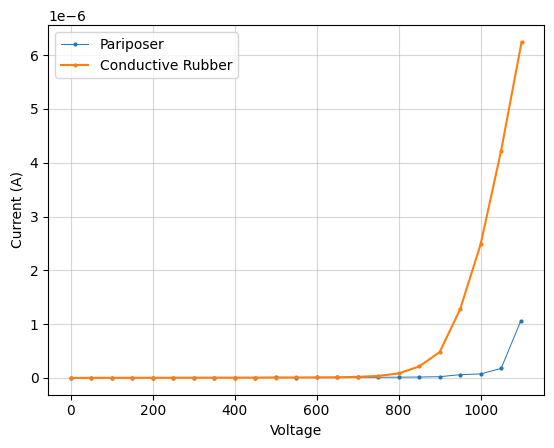

In [70]:
import numpy as np

cr_data_txtfile = r"C:\Code\Next-Gen-Pockels-Control\TEST_DATA\conductive_rubber_50Vsteps.txt"
cr_data = np.loadtxt(cr_data_txtfile, delimiter=',')
print(type(cr_data))
print(cr_data.shape)
# filter for every 3rd element
current_reading = cr_data[::3]
voltage_source = cr_data[1::3]
relative_time = cr_data[2::3]
# create a new dataframe
df_cr = pd.DataFrame({'Current': -current_reading, 'Voltage': -voltage_source, 'Time': relative_time})

pari_data_txtfile = r"C:\Code\Next-Gen-Pockels-Control\TEST_DATA\pariposer_50V-steps_5s-delay.txt"
pari_data = np.loadtxt(pari_data_txtfile, delimiter=',')
current_reading = pari_data[::3]
voltage_source = pari_data[1::3]
relative_time = pari_data[2::3]
# create a new dataframe
df_pari = pd.DataFrame({'Current': -current_reading, 'Voltage': -voltage_source, 'Time': relative_time})

print(df_pari.head()) 

fig, ax = plt.subplots()
# ax.set_yscale('log')
logy_option = False
df_pari.plot(x='Voltage', y='Current', style='-o', label='Pariposer', markersize=2, linewidth=0.7, ax=ax, logy=logy_option)
df_cr.plot(x='Voltage', y='Current', style='-o', label='Conductive Rubber', markersize=2, ax=ax, logy=logy_option)
# ax.set_yscale('log')
plt.grid(True, alpha=0.5)
plt.ylabel('Current (A)')

if logy_option:
    plt.ylabel('Current (A) - log scale')

plt.grid(True, alpha=0.5)

